In [1]:
import os
os.chdir('../')

In [2]:
import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

In [5]:
from time import time

t1 = time()
X_drug, X_target, y = load_process_DAVIS('./data/', binary=False)

drug_encoding = 'CNN'
target_encoding = 'Transformer'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         test_every_X_epoch = 10, 
                         LR = 0.001, 
                         batch_size = 128,
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3, 
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )
model = models.model_initialize(**config)
t2 = time()
print("cost about " + str(int(t2-t1)) + " seconds")

Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
drug encoding finished...
encoding protein...
unique target sequence: 379
protein encoding finished...
splitting dataset...
Done.
cost about 52 seconds


Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 29.46883. Total time 0.0025 hours
Training at Epoch 1 iteration 100 with loss 0.7060796. Total time 0.15722222222222224 hours
Validation at Epoch 1 , MSE: 0.7517753429191877 , Pearson Correlation: 0.2670847301699022 with p-value: 2.880074197423731e-50 , Concordance Index: 0.6096094398032128
--- Go for Testing ---
Up to Epoch 0 Testing MSE: 0.8047580315034151 , Pearson Correlation: 0.1615117446931151 with p-value: 2.0500798959336846e-36 , Concordance Index: 0.5623092001548462
Training at Epoch 2 iteration 0 with loss 0.5947704. Total time 0.2863888888888889 hours
Training at Epoch 2 iteration 100 with loss 0.87183046. Total time 0.4552777777777778 hours
Validation at Epoch 2 , MSE: 0.8569167912585558 , Pearson Correlation: 0.38709377702251907 with p-value: 4.821730131844154e-108 , Concordance Index: 0.6986598489332256
Training at Epoch 3 iteration 0 with loss 0.89327025. Total tim

Training at Epoch 25 iteration 0 with loss 0.51561993. Total time 6.435555555555555 hours
Training at Epoch 25 iteration 100 with loss 0.3576431. Total time 6.568333333333333 hours
Validation at Epoch 25 , MSE: 0.3808393559844777 , Pearson Correlation: 0.7281011189252609 with p-value: 0.0 , Concordance Index: 0.8450353244547316
Training at Epoch 26 iteration 0 with loss 0.34625256. Total time 6.666111111111111 hours
Training at Epoch 26 iteration 100 with loss 0.4938168. Total time 6.797777777777778 hours
Validation at Epoch 26 , MSE: 0.4038114853360873 , Pearson Correlation: 0.736690284963311 with p-value: 0.0 , Concordance Index: 0.8538986712900521
Training at Epoch 27 iteration 0 with loss 0.5388996. Total time 6.898333333333333 hours
Training at Epoch 27 iteration 100 with loss 0.37219703. Total time 7.063055555555556 hours
Validation at Epoch 27 , MSE: 0.37747449433855873 , Pearson Correlation: 0.7334516544440817 with p-value: 0.0 , Concordance Index: 0.8493143029388274
Training a

Validation at Epoch 49 , MSE: 0.2688038162828265 , Pearson Correlation: 0.8168025124832913 with p-value: 0.0 , Concordance Index: 0.875487402667981
Training at Epoch 50 iteration 0 with loss 0.22450684. Total time 14.334166666666667 hours
Training at Epoch 50 iteration 100 with loss 0.18252146. Total time 14.536666666666667 hours
Validation at Epoch 50 , MSE: 0.2599455720414549 , Pearson Correlation: 0.8266730160178569 with p-value: 0.0 , Concordance Index: 0.8792660522199071
Training at Epoch 51 iteration 0 with loss 0.2945141. Total time 14.695277777777777 hours
Training at Epoch 51 iteration 100 with loss 0.27376124. Total time 14.89638888888889 hours
Validation at Epoch 51 , MSE: 0.2652107835358866 , Pearson Correlation: 0.8297527179979158 with p-value: 0.0 , Concordance Index: 0.884653279090695
Training at Epoch 52 iteration 0 with loss 0.18647464. Total time 15.043888888888889 hours
Training at Epoch 52 iteration 100 with loss 0.10718882. Total time 15.243055555555555 hours
Valid

Training at Epoch 74 iteration 0 with loss 0.10863095. Total time 22.835833333333333 hours
Training at Epoch 74 iteration 100 with loss 0.12342718. Total time 23.03388888888889 hours
Validation at Epoch 74 , MSE: 0.2507701375386908 , Pearson Correlation: 0.8388915130530998 with p-value: 0.0 , Concordance Index: 0.884177152525517
Training at Epoch 75 iteration 0 with loss 0.09480692. Total time 23.184722222222224 hours
Training at Epoch 75 iteration 100 with loss 0.20157498. Total time 23.396944444444443 hours
Validation at Epoch 75 , MSE: 0.25530628348544954 , Pearson Correlation: 0.8449576641293957 with p-value: 0.0 , Concordance Index: 0.8921711943428067
Training at Epoch 76 iteration 0 with loss 0.11792371. Total time 23.57611111111111 hours
Training at Epoch 76 iteration 100 with loss 0.14538348. Total time 23.845 hours
Validation at Epoch 76 , MSE: 0.2144399367760175 , Pearson Correlation: 0.8558364841266106 with p-value: 0.0 , Concordance Index: 0.8874572333174184
Training at Epo

Validation at Epoch 98 , MSE: 0.22934280019333014 , Pearson Correlation: 0.8490001436070995 with p-value: 0.0 , Concordance Index: 0.8927241084178033
Training at Epoch 99 iteration 0 with loss 0.10924793. Total time 32.97611111111111 hours
Training at Epoch 99 iteration 100 with loss 0.11092813. Total time 33.19583333333333 hours
Validation at Epoch 99 , MSE: 0.2534271651965403 , Pearson Correlation: 0.8410475570979001 with p-value: 0.0 , Concordance Index: 0.8936499589659869
Training at Epoch 100 iteration 0 with loss 0.085313514. Total time 33.37916666666667 hours
Training at Epoch 100 iteration 100 with loss 0.06564114. Total time 33.647222222222226 hours
Validation at Epoch 100 , MSE: 0.224251314100474 , Pearson Correlation: 0.8503695356178169 with p-value: 0.0 , Concordance Index: 0.8901628379255491
--- Go for Testing ---
Testing MSE: 0.2711707727221614 , Pearson Correlation: 0.8199559586828618 with p-value: 0.0 , Concordance Index: 0.8541680399479676
--- Training Finished ---


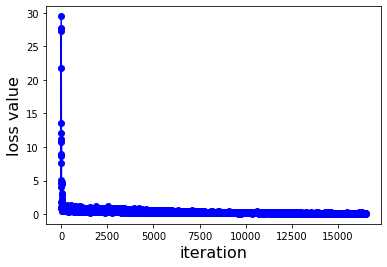

In [8]:
model.train(train, val, test)

In [9]:
model.save_model('./model_CNN_Transformer_Davis')